<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-01-28 18:24:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite'

     0K .......... .......... .......... .......... ..........  0%  238K 2m30s
    50K .......... .......... .......... .......... ..........  0%  877K 95s
   100K .......... .......... .......... .......... ..........  0%  859K 77s
   150K .......... .......... .......... .......... ..........  0% 4.47M 60s
   200K .......... .......... .......... .......... ..........  0%  560K 61s
   250K .....

Connect to the database.


In [3]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [127]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count, Convertedcomp 
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count,ConvertedComp
0,NaN,287,17280.0
1,16.0,3,7560.0
2,17.0,6,NaN
3,18.0,29,47300.0
4,19.0,78,87994.0
5,20.0,109,31344.0
6,21.0,203,1100000.0
7,22.0,406,61000.0
8,23.0,581,95179.0
9,24.0,679,36265.0


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [130]:
# your code goes here
QUERY = """
SELECT *
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

fig = px.histogram(df, x="Age") 
fig.show()

In [133]:
# your code goes here
QUERY = """
SELECT *
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

fig = px.histogram(df, x="Age") 
fig.show()

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [ ]:
fig = px.histogram(df, x="Age") 
fig.show()

### Box Plots


Plot a box plot of `Age.`


In [18]:
# your code goes here

fig2 = px.box(df,x='Age')
fig2.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [20]:
# your code goes here

fig3= px.scatter(df, x='Age', y='WorkWeekHrs')
fig3.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


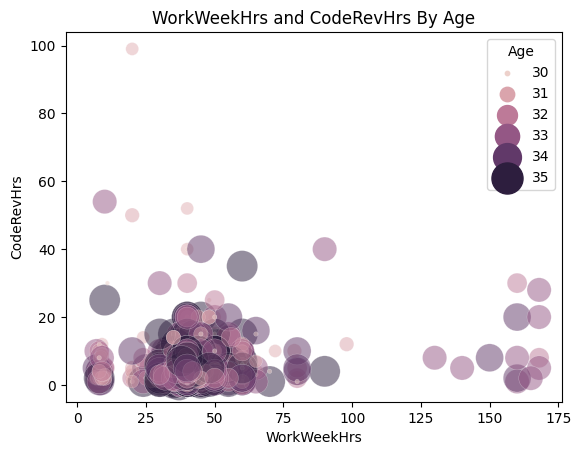

In [72]:
# your code goes here
df2=df

df2.drop(df2.loc[df['WorkWeekHrs']> 200].index, inplace=True)


sns.scatterplot(data=df2, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500)) 

plt.title('WorkWeekHrs and CodeRevHrs By Age') 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

In [51]:
df1['DatabaseDesireNextYear'].unique()


array(['MySQL', 'SQLite', 'PostgreSQL', 'Redis', 'Firebase',
       'Elasticsearch', 'MongoDB', 'Microsoft SQL Server', 'DynamoDB',
       'MariaDB', 'Oracle', 'Couchbase', 'Other(s):', 'Cassandra'],
      dtype=object)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [123]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt

QUERY = """ 
SELECT DatabaseDesireNextYear, COUNT(*) as count 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5 
""" 

df1=pd.read_sql_query(QUERY,conn)  

df1.head()
fig = px.pie(df1, values=df1['count'], names=df1['DatabaseDesireNextYear'], title='DatabaseDesireNextYear')
fig.show()


In [169]:

QUERY = """ 
SELECT LanguageWorkedWith, COUNT(*) as count 
from LanguageWorkedWith 
group by LanguageWorkedWith 
order by count(LanguageWorkedWith) DESC LIMIT 5 
""" 

df1=pd.read_sql_query(QUERY,conn)  

df1.head()
fig = px.pie(df1, values=df1['count'], names=df1['LanguageWorkedWith'], title='LanguageWorkedWith')
fig.show()


In [170]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt

QUERY = """ 
SELECT LanguageDesireNextYear, COUNT(*) as count 
from LanguageDesireNextYear 
group by LanguageDesireNextYear 
order by count(LanguageDesireNextYear) DESC LIMIT 5 
""" 

df1=pd.read_sql_query(QUERY,conn)  

df1.head()
fig = px.pie(df1, values=df1['count'], names=df1['LanguageDesireNextYear'], title='LanguageDesireNextYear')
fig.show()



In [177]:
import matplotlib as mpl
import matplotlib.pyplot as plt

QUERY = """ 
SELECT * 
from DatabaseWorkedWith 
 

""" 
df10=pd.read_sql_query(QUERY,conn)  
resp_sum = df10.groupby('Respondent').sum()


dfmySQL = resp_sum[resp_sum.DatabaseWorkedWith == 'MySQL']
dfmySQL['DatabaseWorkedWith'].value_counts()

MySQL    474
Name: DatabaseWorkedWith, dtype: int64

In [178]:
QUERY = """ 
SELECT * 
from LanguageWorkedWith 
""" 

df10=pd.read_sql_query(QUERY,conn)  


dfmySQL = resp_sum[resp_sum.DatabaseWorkedWith == 'MySQL']
dfmySQL['DatabaseWorkedWith'].value_counts()

MySQL    474
Name: DatabaseWorkedWith, dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [99]:
# your code goes here
QUERY = """ 
SELECT WorkWeekHrs,CodeRevHrs, Age
from master 
Where Age Between 30 and 35 
""" 

df1=pd.read_sql_query(QUERY,conn)  


df1['Age'].fillna(df1['Age'].mean(),inplace=True) 
df1 = df1.groupby('Age').median()


fig4 = px.bar(df1)
fig4.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [18]:
# your code goes here
QUERY = """ 
SELECT ConvertedComp
from master  

""" 
df1=pd.read_sql_query(QUERY,conn)  

QUERY2 = """ 
SELECT LanguageWorkedWith
from LanguageWorkedWith 

""" 



df2=pd.read_sql_query(QUERY2,conn) 
df2 = df2.drop(df2[(df2.LanguageWorkedWith != 'JavaScript') & (df2.LanguageWorkedWith != 'Python')].index)


df1
#df1['LanguageWorkedWith']=df2['LanguageWorkedWith']

#fig = px.box(df1, x='LanguageWorkedWith', y='ConvertedComp')
#fig.show()





,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [118]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as count
from master
group by MainBranch
"""
df5=pd.read_sql_query(QUERY,conn)  

df5.head()

fig = px.bar(df5, x=df5['count'], y=df['MainBranch'].unique(), orientation='h')
fig.show()


In [176]:
# your code goes here
QUERY = """
SELECT DevType, COUNT(*) as count
from DevType
group by DevType
order by count
"""
df5=pd.read_sql_query(QUERY,conn)  

df5



,DevType,count
0,Marketing or sales professional,61
1,Senior executive/VP,160
2,Scientist,354
3,Engineering manager,386
4,"Engineer, site reliability",449
5,"Developer, game or graphics",472
6,Product manager,480
7,Educator,514
8,Academic researcher,556
9,Student,766


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
